# Logistic Regression with Python
We'll be trying to predict a classification- survival or deceased.

### Titanic Dataset from kaggle

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
train = pd.read_csv('titanic_train.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Exploratory Data Analysis
Checking out missing data!    
We can use seaborn to create a simple heatmap to see where we are missing data!

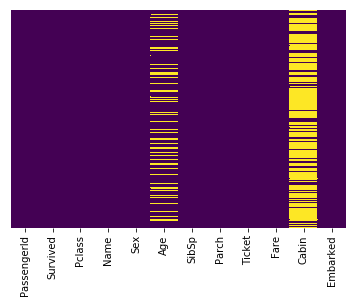

In [5]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [6]:
sns.set_style('whitegrid')

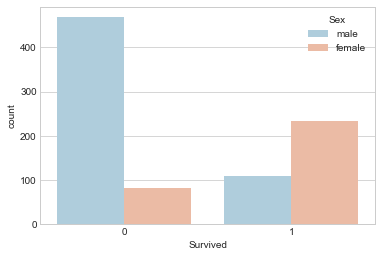

In [7]:
sns.countplot(x='Survived', data=train, hue='Sex', palette='RdBu_r')

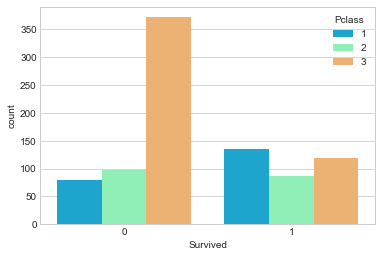

In [8]:
sns.countplot(x='Survived', data=train, hue='Pclass', palette='rainbow')

C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


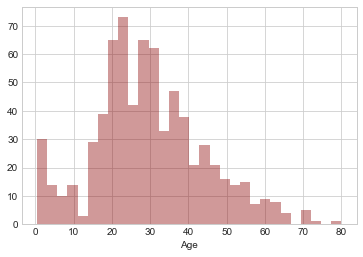

In [9]:
sns.distplot(train['Age'].dropna(), kde=False, bins=30, color='darkred')

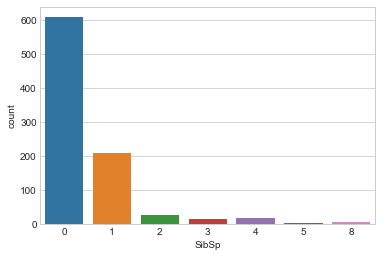

In [10]:
sns.countplot(x='SibSp', data=train)

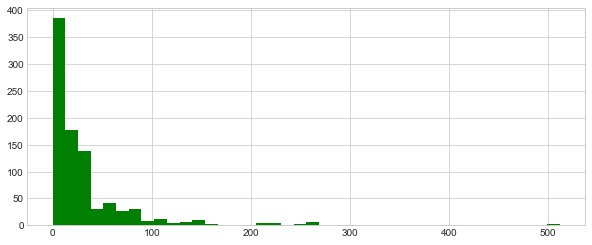

In [11]:
train['Fare'].hist(bins=40, figsize=(10,4), color='green')

## Data Cleaning

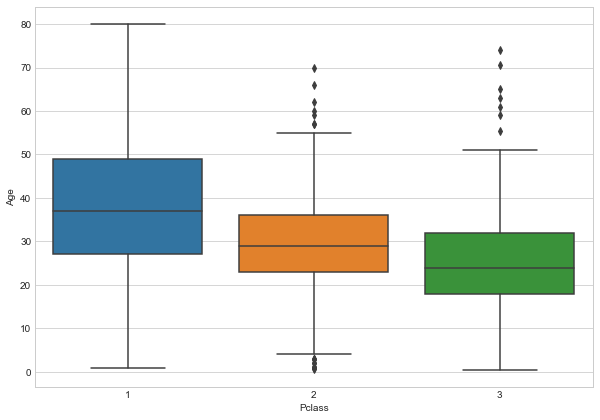

In [12]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass', y='Age', data=train)

In [13]:
def impute_age(cols):
    Age= cols[0]
    Pclass= cols[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        if Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [14]:
train['Age']= train[['Age','Pclass']].apply(impute_age, axis=1)

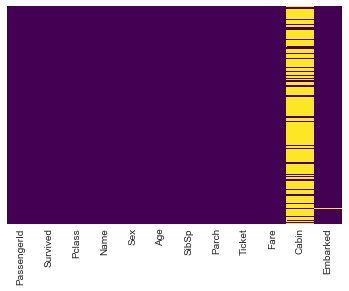

In [15]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [16]:
train.drop('Cabin', axis=1, inplace=True)

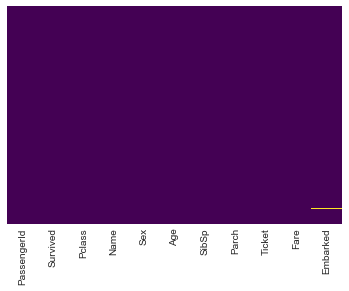

In [17]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [18]:
train['Embarked'].describe()    #Fill null value with top = S

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [19]:
train['Embarked'].fillna('S', inplace=True)

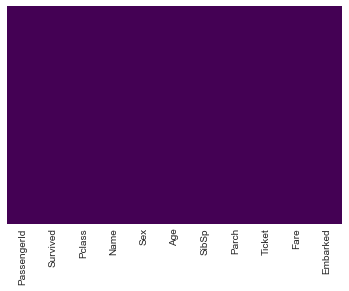

In [20]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

## Converting Categorical Features 

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


In [22]:
sex= pd.get_dummies(data=train['Sex'], drop_first=True)

In [23]:
embark = pd.get_dummies(data=train['Embarked'], drop_first=True)

In [24]:
train = pd.concat([train,sex,embark], axis=1)

In [25]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1


In [26]:
train.drop(['PassengerId','Name', 'Sex', 'Ticket', 'Embarked'], axis=1, inplace=True)

In [27]:
train.head(4)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1


In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
male        891 non-null uint8
Q           891 non-null uint8
S           891 non-null uint8
dtypes: float64(2), int64(4), uint8(3)
memory usage: 44.5 KB


## Building a Logistic Regression model

In [29]:
X= train.drop('Survived', axis=1)   #Features
y= train['Survived']                #label

## Train Test Split
Splitting our data into a training set and test set

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
logmodel = LogisticRegression()

In [34]:
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [35]:
predictions = logmodel.predict(X_test)

# Evaluation

We can check precision,recall,f1-score using classification report!

In [37]:
from sklearn.metrics import classification_report

In [38]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.77      0.86      0.81       154
          1       0.78      0.65      0.71       114

avg / total       0.77      0.77      0.77       268



In [40]:
from sklearn.metrics import confusion_matrix

In [41]:
confusion_matrix(y_test, predictions)

array([[133,  21],
       [ 40,  74]], dtype=int64)